<h2> Testing skill weighting with business analyst </h2>

In [ ]:
import pandas as pd
ba = pd.read_csv('/content/business analyst_skills.csv')
ba.head()

#Getting min and max count from our dataset
min_count = ba['Count'].min()
max_count = ba['Count'].max()

# Min-Max scaling
ba['weightage'] = (ba['Count'] - min_count) / (max_count - min_count)




In [ ]:
ba.head()

,Element,Count,weightage
0,business analysis,85,1.000000
1,business analyst,73,0.857143
2,it skills,61,0.714286
3,sql,43,0.500000
4,requirement gathering,39,0.452381


In [ ]:
ba.to_csv('weighted_ba.csv')

<h2> Creating weighted graph </h2>

Weighted ba skills was made by comparing our original ba skill map dataset and adding weights from weighted_ba to the skill

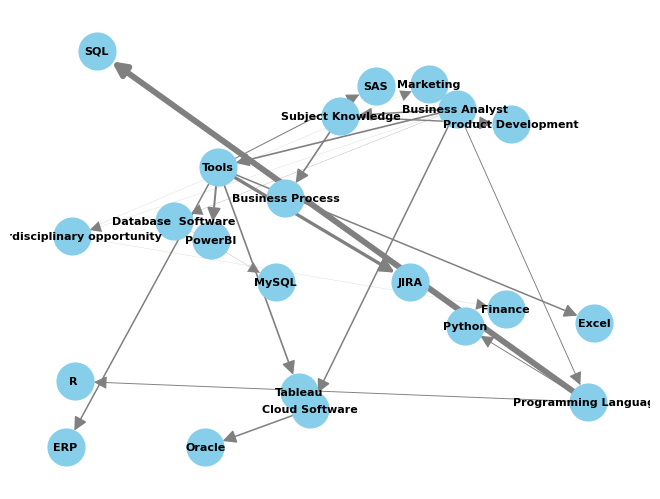

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd

#Multiplied weightage with 8.5 so that the edges are more thick and visible
ba_skills = pd.read_csv('/content/weighted_ba_skills.csv')
ba_skills['Weightage'] = ba_skills['Weightage'] * 8.5
# Create a directed graph
G = nx.DiGraph()

# Add edges with different weights for each skill and tool from the DataFrame
for _, row in ba_skills.iterrows():
    job_title = row['Job Title']
    category = row['Category']
    skill_tool = row['Skills and tools']
    weight = row['Weightage']

    G.add_node(job_title)
    G.add_edge(job_title, category, weight=weight)
    G.add_edge(category, skill_tool, weight=weight)

# Draw the graph with varying arrow thickness based on the weight
pos = nx.random_layout(G)
edge_weights = [d['weight'] for u, v, d in G.edges(data=True)]
edge_weights_normalized = [w / max(edge_weights) for w in edge_weights]  # Normalize weights to [0, 1]

nx.draw(
    G,
    pos,
    with_labels=True,
    node_size=700,
    node_color='skyblue',
    font_size=8,
    font_color='black',
    font_weight='bold',
    edge_color='gray',
    width=edge_weights,  # Varying width based on normalized weights
    arrowsize=20
)

# Display the plot
plt.show()


In [ ]:
nx.write_gexf(G, 'weightage_ba.gexf')

In [ ]:
ds = pd.read_csv('/content/data science_skills.csv')
se = pd.read_csv('/content/software engineer_skills.csv')

In [ ]:
min_count = se['Count'].min()
max_count = se['Count'].max()

# Min-Max scaling
se['weightage'] = (se['Count'] - min_count) / (max_count - min_count)

In [ ]:
min_count = ds['Count'].min()
max_count = ds['Count'].max()

# Min-Max scaling
ds['weightage'] = (ds['Count'] - min_count) / (max_count - min_count)

In [ ]:
se.head()

,Element,Count,weightage
0,it skills,279,1.000000
1,java,197,0.705036
2,testing,134,0.478417
3,javascript,124,0.442446
4,cloud,112,0.399281


In [ ]:
ds.head()

,Element,Count,weightage
0,machine learning,134,1.000000
1,python,134,1.000000
2,data science,92,0.684211
3,it skills,43,0.315789
4,r,43,0.315789


In [ ]:
ds.to_csv('weighted_ds.csv')
se.to_csv('weighted_se.csv')

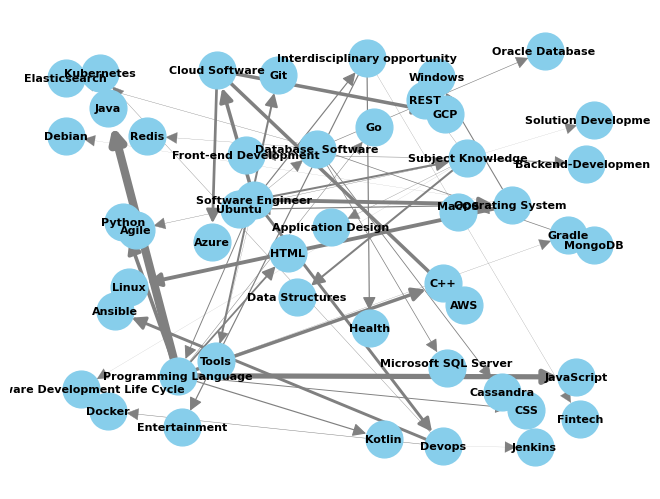

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd


se_skills = pd.read_csv('/content/weighted_se_skills.csv')
se_skills['Weightage'] = se_skills['Weightage'] * 8.5
# Create a directed graph
G = nx.DiGraph()

# Add edges with different weights for each skill and tool from the DataFrame
for _, row in se_skills.iterrows():
    job_title = row['Job Title']
    category = row['Category']
    skill_tool = row['Skills and tools']
    weight = row['Weightage']

    G.add_node(job_title)
    G.add_edge(job_title, category, weight=weight)
    G.add_edge(category, skill_tool, weight=weight)

# Draw the graph with varying arrow thickness based on the weight
pos = nx.random_layout(G)
edge_weights = [d['weight'] for u, v, d in G.edges(data=True)]
edge_weights_normalized = [w / max(edge_weights) for w in edge_weights]  # Normalize weights to [0, 1]

nx.draw(
    G,
    pos,
    with_labels=True,
    node_size=700,
    node_color='skyblue',
    font_size=8,
    font_color='black',
    font_weight='bold',
    edge_color='gray',
    width=edge_weights,  # Varying width based on normalized weights
    arrowsize=20
)

# Display the plot
plt.show()


In [ ]:
nx.write_gexf(G,'weighted_se.gexf')

<h2> Creating Radar charts </h2>

In [40]:
data = pd.read_csv('Skill_Map.csv')

In [41]:
data = data.dropna()

In [42]:
data

,Job Title,Category,Skills and tools
0,Data Scientist,Programming Language,"Python, R"
1,Data Scientist,Subject Knowledge,"CICD, NLP, Deep Learning, DevOps, ETL, ML algo..."
2,Data Scientist,ML Framework,OpenCV
3,Data Scientist,Database Software,"NoSQL, SQL, Data warehouse, MongoDB"
4,Data Scientist,Cloud Software,"Azure, Hadoop,GCP"
...,...,...,...
66,QA Enginner,Subject Knowledge,"Software testing, QA methodologies, DevOps, CI..."
67,QA Enginner,Database Software,"MySQL, NoSQL, Postgres, MongoDB"
68,QA Enginner,Tools,"JIRA, Selenium, CAD, Appium"
69,QA Enginner,Operating System Software,"iOS, Linux, Windows, MacOS, Android"


In [31]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Example DataFrame
data = {
    'Job Title': ['Data Scientist', 'Data Analyst', 'Software Engineer'],
    'Category': ['Data Science', 'Data Science', 'Software Engineering'],
    'Skills': [['Python', 'R', 'Machine Learning'],
               ['SQL', 'Excel', 'Statistics'],
               ['Java', 'Python', 'Algorithm Design']]
}

df = pd.DataFrame(data)

# Add a new column 'Weight' to store the count of skills and tools
df['Weight'] = df['Skills'].apply(lambda x: len(x))


In [44]:
data['Weight'] = data['Skills and tools'].apply(lambda x: len(x))

In [45]:
data

,Job Title,Category,Skills and tools,Weight
0,Data Scientist,Programming Language,"Python, R",9
1,Data Scientist,Subject Knowledge,"CICD, NLP, Deep Learning, DevOps, ETL, ML algo...",59
2,Data Scientist,ML Framework,OpenCV,6
3,Data Scientist,Database Software,"NoSQL, SQL, Data warehouse, MongoDB",35
4,Data Scientist,Cloud Software,"Azure, Hadoop,GCP",17
...,...,...,...,...
66,QA Enginner,Subject Knowledge,"Software testing, QA methodologies, DevOps, CI...",66
67,QA Enginner,Database Software,"MySQL, NoSQL, Postgres, MongoDB",31
68,QA Enginner,Tools,"JIRA, Selenium, CAD, Appium",27
69,QA Enginner,Operating System Software,"iOS, Linux, Windows, MacOS, Android",35


In [46]:
radar_data = data[['Job Title', 'Category', 'Weight']]

In [47]:
radar_ds =  radar_data[~radar_data['Job Title'].isin(['Software Engineer', 'Network Engineer', 'Cybersecurity Analyst', 'QA Enginner'])]

In [48]:
radar_ds

,Job Title,Category,Weight
0,Data Scientist,Programming Language,9
1,Data Scientist,Subject Knowledge,59
2,Data Scientist,ML Framework,6
3,Data Scientist,Database Software,35
4,Data Scientist,Cloud Software,17
5,Data Scientist,Tools,51
6,Data Scientist,Operating System Software,5
7,Data Scientist,Interdisciplinary opportunity,10
8,Data Analyst,Programming Language,14
9,Data Analyst,Subject Knowledge,26


In [55]:
new_radar_ds = radar_ds[radar_ds['Category'].isin(['Programming Language', 'Subject Knowledge', 'Database Software', 'Tools'])]

In [56]:
new_radar_ds

,Job Title,Category,Weight
0,Data Scientist,Programming Language,9
1,Data Scientist,Subject Knowledge,59
5,Data Scientist,Tools,51
8,Data Analyst,Programming Language,14
9,Data Analyst,Subject Knowledge,26
13,Data Analyst,Tools,62
16,Business Analyst,Programming Language,14
17,Business Analyst,Subject Knowledge,37
21,Business Analyst,Tools,40
25,Machine Learning Engineer,Programming Language,9


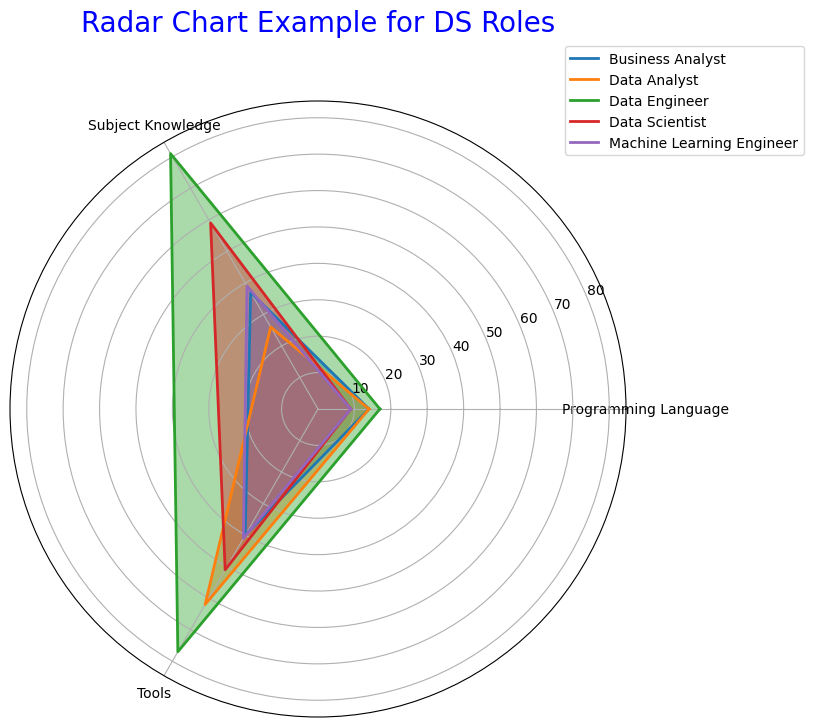

In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


df = pd.DataFrame(new_radar_ds)

# Number of categories
num_categories = len(df['Category'].unique())

# Create a figure and axis
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

# Set the angle for each category
angles = np.linspace(0, 2 * np.pi, num_categories, endpoint=False).tolist()
angles += angles[:1]

# Plot radar charts for each role
for role, role_data in df.groupby('Job Title'):
    values = role_data['Weight'].tolist() + [role_data['Weight'].iloc[0]]  # Add the first value at the end to close the radar
    ax.plot(angles, values, linewidth=2, linestyle='solid', label=role)
    ax.fill(angles, values, alpha=0.4)

# Set the labels for each category
ax.set_xticks(angles[:-1])
ax.set_xticklabels(df['Category'].unique())

# Set the title
ax.set_title('Radar Chart Example for DS Roles', size=20, color='blue', y=1.1)

# Display the legend
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))

# Show the plot
plt.show()


Creating Domain based skill association graphs

In [1]:
import pandas as pd

In [2]:
ds_domain = pd.read_csv('Skill_Map.csv')

In [3]:
ds_domain.head()

,Job Title,Category,Skills and tools
0,Data Scientist,Programming Language,"Python, R"
1,Data Scientist,Subject Knowledge,"CICD, NLP, Deep Learning, DevOps, ETL, ML algo..."
2,Data Scientist,ML Framework,OpenCV
3,Data Scientist,Database Software,"NoSQL, SQL, Data warehouse, MongoDB"
4,Data Scientist,Cloud Software,"Azure, Hadoop,GCP"


In [5]:
ds_domain.columns

Index(['Job Title', 'Category', 'Skills and tools'], dtype='object')

In [8]:
ds_domain = ds_domain.drop('Category', axis = 1)

In [11]:
new_ds_domain = ds_domain[~ds_domain['Job Title'].isin(['Software Engineer', 'Network Engineer', 'Cybersecurity Analyst', 'QA Enginner'])]

In [12]:
new_ds_domain

,Job Title,Skills and tools
0,Data Scientist,"Python, R"
1,Data Scientist,"CICD, NLP, Deep Learning, DevOps, ETL, ML algo..."
2,Data Scientist,OpenCV
3,Data Scientist,"NoSQL, SQL, Data warehouse, MongoDB"
4,Data Scientist,"Azure, Hadoop,GCP"
5,Data Scientist,"SPSS, SAS, Tableau, Power BI, Excel , Power p..."
6,Data Scientist,Linux
7,Data Scientist,Healthcare
8,Data Analyst,"Python, R, SQL"
9,Data Analyst,"Data Modeling, Data Mining"


In [14]:
new_ds_domain = new_ds_domain.dropna()

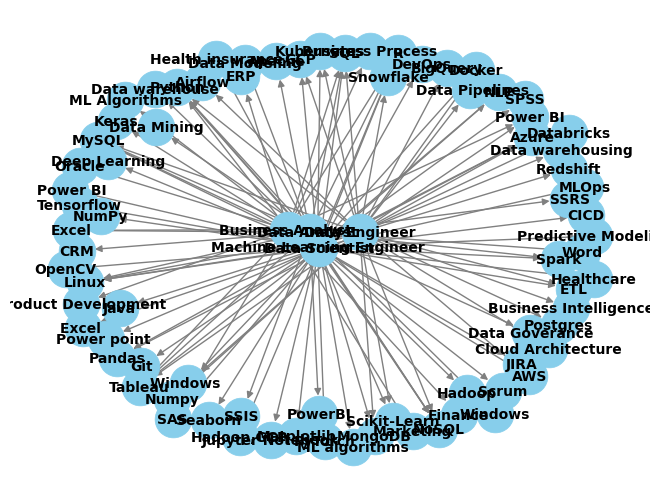

In [19]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt



# Create a directed graph
G = nx.DiGraph()

# Add nodes (job titles and skills)
for _, row in new_ds_domain.iterrows():
    job_title = row['Job Title']
    skills = row['Skills and tools'].split(', ')

    G.add_node(job_title)
    G.add_nodes_from(skills)

    # Add edges from job title to each skill
    G.add_edges_from([(job_title, skill) for skill in skills])

# Draw the graph
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=700, node_color="skyblue", font_size=10, font_color="black", font_weight="bold", edge_color="gray", linewidths=0.5)

# Display the graph
plt.show()


In [20]:
nx.write_gexf(G, 'ds_domain_skill_graph.gexf')